# Визуализация многомерного шкалирования

152 152 152
[0, 76]
0 1
0 1


/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_41875/1834810114.py:327: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_cities).colors
/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_41875/1834810114.py:396: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  ani.save(f'MDS_proto_{config["problem"]}_{config["n_cities"]}.mp4',fps=config["fps"], dpi=config["dpi"])


0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
76 77
76 78
76 79
76 80
76 81
76 82
76 83
76 84
76 85
76 86
76 87
76 88
76 89
76 90
76 91
76 92
76 93
76 94
76 95
76 96
76 97
76 98
76 99
76 100
76 101
76 102
76 103
76 104
76 105
76 106
76 107
76 108
76 109
76 110
76 111
76 112
76 113
76 114
76 115
76 116
76 117
76 118
76 119
76 120
76 121
76 122
76 123
76 124
76 125
76 126
76 127
76 128
76 129
76 130
76 131
76 132
76 133
76 134
76 135
76 136
76 137
76 138
76 139
76 140
76 141
76 142
76 143
76 144
76 145
76 146
76 147
76 148
76 149
76 150
76 151
76 152
0 1


/Users/bratishka/.pyenv/versions/3.9.17/envs/benchmarx/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/Users/bratishka/.pyenv/versions/3.9.17/envs/benchmarx/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


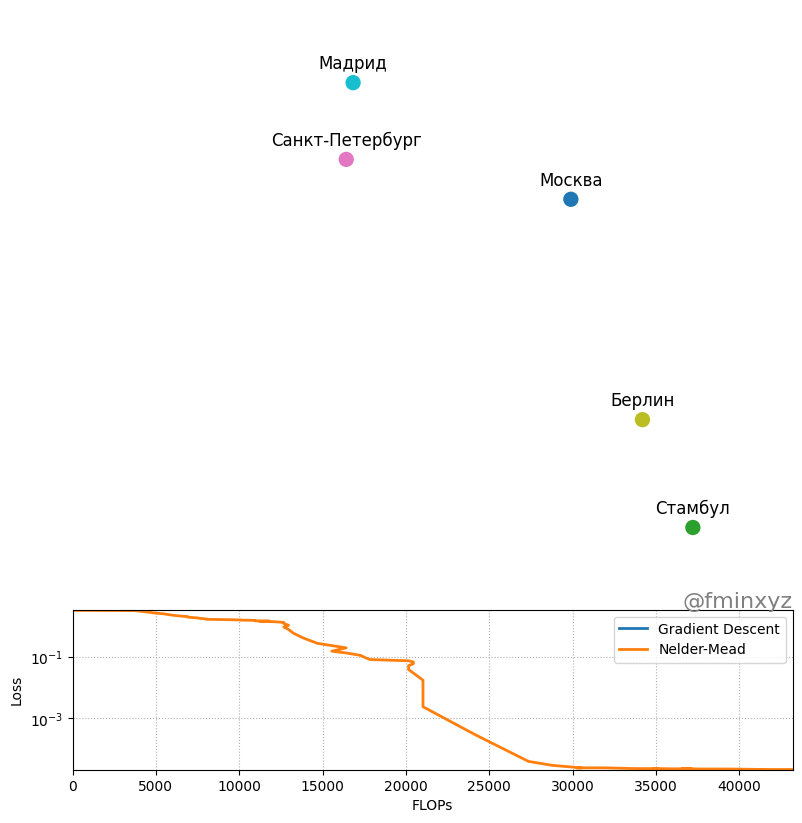

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import gridspec
import json
from scipy.optimize import minimize
import os
import requests

# # Configuration EUROPE
config = {
    "n_cities": 20,
    "problem": "usa", # could be "europe", "usa", "world"
    "distance_scaling": True,
    "skip_rate": 1,
    "dpi": 300,
    "fps": 60,
    "methods": [
        {
            "type": "Gradient Descent",
            "hyperparameters": {"lr": 5e-3},
            "n_iter": 300,
            "rotation_angle": 35,
            "reflect_y": False,
            "reflect_x": False,
        },
        {
            "type": "Gradient Descent",
            "hyperparameters": {"lr": 2e-2},
            "n_iter": 200,
            "rotation_angle": 35,
            "reflect_y": False,
            "reflect_x": False,
        },
        {
            "type": "Gradient Descent",
            "hyperparameters": {"lr": 4e-2},
            "n_iter": 100,
            "rotation_angle": 35,
            "reflect_y": False,
            "reflect_x": False,
        },
    ]
}


# Configuration USA
config = {
    "n_cities": 20,
    "problem": "usa", # could be "europe", "usa", "world"
    "distance_scaling": True,
    "skip_rate": 1,
    "dpi": 300,
    "fps": 60,
    "methods": [
        {
            "type": "Gradient Descent",
            "hyperparameters": {"lr": 5e-3},
            "n_iter": 300,
            "rotation_angle": 170,
            "reflect_y": False,
            "reflect_x": True,
        },
        {
            "type": "Gradient Descent",
            "hyperparameters": {"lr": 2e-2},
            "n_iter": 200,
            "rotation_angle": 170,
            "reflect_y": False,
            "reflect_x": True,
        },
        {
            "type": "Gradient Descent",
            "hyperparameters": {"lr": 4e-2},
            "n_iter": 100,
            "rotation_angle": 170,
            "reflect_y": False,
            "reflect_x": True,
        },
    ]
}

config = {
    "n_cities": 6,
    "problem": "europe",  # could be "europe", "usa", "world"
    "distance_scaling": True,
    "skip_rate": 1,
    "dpi": 300,
    "fps": 30,
    "methods": [
        {
            "type": "Gradient Descent",
            "hyperparameters": {"lr": 12e-2},
            "n_iter": 75,
            "rotation_angle": 25,
            "reflect_y": False,
            "reflect_x": False,
        },
        {
            "type": "Nelder-Mead",
            "hyperparameters": {},  # Nelder-Mead doesn't need hyperparameters like learning rate
            "n_iter": 75,  # Set the number of iterations for Nelder-Mead
            "rotation_angle": -40,
            "reflect_y": False,
            "reflect_x": False,
        }
    ]
}

# config = {
#     "n_cities": 15,
#     "problem": "europe",  # could be "europe", "usa", "world"
#     "distance_scaling": True,
#     "skip_rate": 1,
#     "dpi": 300,
#     "fps": 30,
#     "methods": [
#         {
#             "type": "Gradient Descent",
#             "hyperparameters": {"lr": 3e-2},
#             "n_iter": 130,
#             "rotation_angle": 25,
#             "reflect_y": False,
#             "reflect_x": False,
#         },
#         {
#             "type": "Nelder-Mead",
#             "hyperparameters": {},  # Nelder-Mead doesn't need hyperparameters like learning rate
#             "n_iter": 300,  # Set the number of iterations for Nelder-Mead
#             "rotation_angle": 30,
#             "reflect_y": False,
#             "reflect_x": False,
#         }
#     ]
# }

# config = {
#     "n_cities": 34,
#     "problem": "europe",  # could be "europe", "usa", "world"
#     "distance_scaling": True,
#     "skip_rate": 1,
#     "dpi": 300,
#     "fps": 30,
#     "methods": [
#         {
#             "type": "Gradient Descent",
#             "hyperparameters": {"lr": 1e-2},
#             "n_iter": 200,
#             "rotation_angle": 10,
#             "reflect_y": False,
#             "reflect_x": False,
#         },
#         {
#             "type": "Nelder-Mead",
#             "hyperparameters": {},  # Nelder-Mead doesn't need hyperparameters like learning rate
#             "n_iter": 400,  # Set the number of iterations for Nelder-Mead
#             "rotation_angle": 50,
#             "reflect_y": False,
#             "reflect_x": False,
#         }
#     ]
# }

# URL of the JSON file
url = f"https://raw.githubusercontent.com/MerkulovDaniil/optim/master/assets/Notebooks/mds_{config['problem']}_cities.json"

cities_path = f"mds_{config['problem']}_cities.json"

# Check if the file already exists
if os.path.exists(cities_path):
    print(f"File '{cities_path}' already exists.")
else:
    # Send an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Save the content of the response to a local file
        with open(f"mds_{config['problem']}_cities.json", "wb") as file:
            file.write(response.content)
        print("File downloaded successfully.")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")


# Helper function to flatten the coordinates
def flatten_coords(coords):
    return coords.flatten()

# Helper function to unflatten the coordinates
def unflatten_coords(flat_coords, n_cities):
    return flat_coords.reshape(n_cities, 2)

# Center
def recenter(coords):
    centroid = np.mean(coords, axis=0)
    centered_coords = coords - centroid
    return centered_coords

# Nelder-Mead optimization wrapper
def nelder_mead(coords, D, n_iter):
    n_cities = coords.shape[0]

    def objective_function(flat_coords):
        coords = unflatten_coords(flat_coords, n_cities)
        return loss_function(coords, D)

    # Initial guess
    initial_coords = flatten_coords(coords)

    # Perform Nelder-Mead optimization
    result = minimize(objective_function, initial_coords, method='Nelder-Mead', options={'maxiter': n_iter})
    optimized_coords = unflatten_coords(result.x, n_cities)

    return optimized_coords, result.fun, result.nfev

# Function to load city data and return the subset of cities and distances
def get_cities_and_distances(n):
    with open(cities_path, "r", encoding="utf-8") as f:
        loaded_data = json.load(f)

    cities = loaded_data["cities"]
    D = np.array(loaded_data["distances"])

    if n > len(cities):
        n = len(cities)

    return cities[:n], D[:n, :n]

# Helper functions
def euclidean_distance_matrix(coords):
    dist_matrix = np.sqrt(((coords[:, np.newaxis] - coords) ** 2).sum(axis=2))
    return dist_matrix

def loss_function(coords, D):
    est_distances = euclidean_distance_matrix(coords)
    return np.sum((D - est_distances) ** 2)

def gradient(coords, D):
    est_distances = euclidean_distance_matrix(coords)
    grad = np.zeros_like(coords)
    n_cities = coords.shape[0]
    for i in range(n_cities):
        for j in range(n_cities):
            if i != j:
                diff = coords[i] - coords[j]
                dist = est_distances[i, j]
                real_dist = D[i, j]
                if dist != 0:
                    grad[i] += 2 * (dist - real_dist) * (diff / dist)
    return grad

def rotate_coords(coords, angle_deg):
    angle_rad = np.radians(angle_deg)
    centroid = np.mean(coords, axis=0)
    centered_coords = coords - centroid
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)], 
                                [np.sin(angle_rad), np.cos(angle_rad)]])
    rotated_coords = centered_coords.dot(rotation_matrix)
    return rotated_coords + centroid

def reflect_coords(coords, reflect_axis='x'):
    centroid = np.mean(coords, axis=0)
    centered_coords = coords - centroid
    if reflect_axis == 'x':
        reflected_coords = centered_coords * np.array([1, -1])
    elif reflect_axis == 'y':
        reflected_coords = centered_coords * np.array([-1, 1])
    return reflected_coords + centroid

# Function to run experiments based on configuration
def run_experiment(config):
    cities, D = get_cities_and_distances(config["n_cities"])

    if config["distance_scaling"]:
        D = D / np.max(D)

    n_cities = len(cities)

    methods_results = []

    for method_config in config["methods"]:
        method_type = method_config["type"]
        n_iter = method_config["n_iter"]
        np.random.seed(42)
        coords = np.random.rand(n_cities, 2)
        coords_history = [coords.copy()]
        loss_history = [loss_function(coords, D)]
        flops_history = [0]

        if method_type == "Gradient Descent":
            lr = method_config["hyperparameters"]["lr"]
            for iteration in range(n_iter):
                grad = gradient(coords, D)
                coords -= lr * grad
                coords_history.append(coords.copy())
                loss_history.append(loss_function(coords, D))
                # each gradient step costs approximately 13n^2 flops 
                flops_history.append(flops_history[-1] + 13 * n_cities * n_cities)

        elif method_type == "Nelder-Mead":
            for iteration in range(n_iter):
                coords, loss, nfev = nelder_mead(coords, D, iteration + 1)
                coords_history.append(coords.copy())
                loss_history.append(loss)
                # each nfev costs approximately 8n^2 flops 
                flops_history.append(nfev*8*n_cities * n_cities)

        if method_config["reflect_y"]:
            coords_history = [reflect_coords(c, reflect_axis='y') for c in coords_history]
        
        if method_config["reflect_x"]:
            coords_history = [reflect_coords(c, reflect_axis='x') for c in coords_history]

        coords_history = [rotate_coords(c, method_config["rotation_angle"]) for c in coords_history[::config["skip_rate"]]]
        coords_history = [recenter(c) for c in coords_history]

        methods_results.append({
            "coords_history": coords_history,
            "loss_history": loss_history,
            "flops_history": flops_history,
            "cities": cities,
            "type": method_type,
            "hyperparameters": " ".join([str(key)+" "+str(value) for key,value in method_config["hyperparameters"].items()]),

        })

    return methods_results

# Function to plot the animation
def plot_animation(data):
    total_frames = 0
    global_coords_history = []
    global_loss_history = []
    global_flops_history = []
    labels = []
    exp_start_ids = [0]
    # Initialization
    for res in data:
        cities = res["cities"]
        coords_history = res["coords_history"]
        total_frames += len(res["coords_history"])
        exp_start_ids.append(total_frames)
        global_coords_history.extend(coords_history)
        global_loss_history.extend(res["loss_history"][::config["skip_rate"]])
        global_flops_history.extend(res["flops_history"][::config["skip_rate"]])
        labels.append(res["type"])
    
    n_experiments = len(data)
    n_cities = len(cities)
    print(len(global_coords_history), len(global_loss_history), len(global_flops_history))

    coords_history_stack = np.vstack(data[0]["coords_history"])
    x_min, x_max = np.min(coords_history_stack[:, 0]), np.max(coords_history_stack[:, 0])
    y_min, y_max = np.min(coords_history_stack[:, 1]), np.max(coords_history_stack[:, 1])

    margin = 0.04
    x_min, x_max = x_min - margin, x_max + margin
    y_min, y_max = y_min + margin, y_max - margin

    colors = plt.cm.get_cmap('tab10', n_cities).colors

    fig = plt.figure(figsize=(8, 8), layout="constrained")
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])

    ax_left = plt.subplot(gs[0])
    ax_right = plt.subplot(gs[1])
    ax_left.set_xlim(x_min, x_max)
    ax_left.set_ylim(y_min, y_max)
    ax_left.set_xticks([])
    ax_left.set_yticks([])
    ax_left.set_frame_on(False)
    ax_right.set_xlim(0, max(global_flops_history))
    ax_right.set_ylim(min(global_loss_history), min(max(global_loss_history)*1.05, 2e2))
    ax_right.set_yscale('log')

    lines = []
    for i in range(n_cities):
        line, = ax_left.plot([], [], lw=2, color=colors[i], alpha=0.2)
        lines.append(line)
    
    points = ax_left.scatter(coords_history[0][:, 0], coords_history[0][:, 1], c=colors, s=100, zorder=2)
    texts = [ax_left.text(coords_history[0][i, 0], coords_history[0][i, 1], cities[i], fontsize=12, zorder=3)
            for i in range(n_cities)]
    
    loss_curves = []
    for i in range(n_experiments):
        loss_curve, = ax_right.plot([], [], lw=2, label=labels[i])
        loss_curves.append(loss_curve)
    ax_right.set_xlabel('FLOPs')
    ax_right.set_ylabel('Loss')
    ax_right.grid(linestyle=":")
    ax_right.legend()
    ax_right.set_axisbelow(True)
    ax_right.annotate('@fminxyz',
                fontsize=16, c='grey', zorder=20,
                xy=(1.0, 0.23), xytext=(0, 20),
                xycoords=('axes fraction', 'figure fraction'),
                textcoords='offset points',
                ha='right', va='bottom')

    ax_left.set_position([0.03, 0.26, 0.95, 0.75])  # Full width
    ax_right.set_position([0.08, 0.06, 0.9, 0.2])  # Full width

    def animate(i):
        current_coords = global_coords_history[i]
        points.set_offsets(current_coords)
        for j, txt in enumerate(texts):
            txt.set_position((current_coords[j, 0], current_coords[j, 1] + 0.02))
            txt.set_horizontalalignment("center")

        diffs = np.array(exp_start_ids)-i
        diffs = diffs[diffs <= 0]
        n_exp = np.argmax(diffs)
        start_id = exp_start_ids[n_exp]
        print(start_id, i+1)

        for j, line in enumerate(lines):
            line.set_data([c[j, 0] for c in global_coords_history[start_id:i + 1]], 
                            [c[j, 1] for c in global_coords_history[start_id:i + 1]])
        
        loss_curves[n_exp].set_data(global_flops_history[start_id:i + 1], global_loss_history[start_id:i + 1])

        return points, loss_curves

    exp_start_ids.pop()
    print(exp_start_ids)
    ani = FuncAnimation(fig, animate, frames=total_frames)
    # This took about 0.3 minutes on Macbook Pro with M1 Pro
    ani.save(f'MDS_proto_{config["problem"]}_{config["n_cities"]}.mp4',fps=config["fps"], dpi=config["dpi"])

# Example usage
data = run_experiment(config)
plot_animation(data)

## Скачиваем данные всех городов миллиоников Европы

In [ ]:
import numpy as np
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import json

# Function to get city coordinates using geopy
def get_city_coordinates(city, country):
    geolocator = Nominatim(user_agent="city_distance_calculator")
    location = geolocator.geocode(f"{city}, {country}")
    if location:
        return (location.latitude, location.longitude)
    else:
        return None

# Full list of most populated cities in Europe along with their countries
cities = [
    ("Москва", "Россия"),
    ("Стамбул", "Турция"),
    ("Лондон", "Великобритания"),
    ("Санкт-Петербург", "Россия"),
    ("Берлин", "Германия"),
    ("Мадрид", "Испания"),
    ("Киев", "Украина"),
    ("Рим", "Италия"),
    ("Париж", "Франция"),
    ("Минск", "Белоруссия"),
    ("Вена", "Австрия"),
    ("Гамбург", "Германия"),
    ("Бухарест", "Румыния"),
    ("Варшава", "Польша"),
    ("Будапешт", "Венгрия"),
    ("Барселона", "Испания"),
    ("Мюнхен", "Германия"),
    ("Харьков", "Украина"),
    ("Белград", "Сербия"),
    ("Милан", "Италия"),
    ("Казань", "Россия"),
    ("Прага", "Чехия"),
    ("София", "Болгария"),
    ("Нижний Новгород", "Россия"),
    ("Уфа", "Россия"),
    ("Самара", "Россия"),
    ("Бирмингем", "Великобритания"),
    ("Ростов-на-Дону", "Россия"),
    ("Краснодар", "Россия"),
    ("Кёльн", "Германия"),
    ("Воронеж", "Россия"),
    ("Пермь", "Россия"),
    ("Волгоград", "Россия"),
    ("Одесса", "Украина")
]

# Extract city names for later assignment
city_names = [city[0] for city in cities]

# Function to calculate pairwise distances
def calculate_pairwise_distances(n):
    if n > len(cities):
        n = len(cities)

    # Get coordinates for the selected number of cities
    coordinates = []
    for city, country in cities[:n]:
        coord = get_city_coordinates(city, country)
        if coord:
            coordinates.append(coord)
        else:
            raise ValueError(f"Coordinates not found for {city}, {country}")

    # Create an empty distance matrix
    distance_matrix = np.zeros((n, n))

    # Calculate pairwise distances
    for i in range(n):
        for j in range(i + 1, n):
            dist = geodesic(coordinates[i], coordinates[j]).kilometers
            distance_matrix[i, j] = dist
            distance_matrix[j, i] = dist

    return distance_matrix

# Input: Number of cities to calculate distances for
n = len(cities)  # Use all cities in this case
distance_matrix = calculate_pairwise_distances(n)

# Save the data to a JSON file (you can also save it as npy if preferred)
output_data = {
    "cities": city_names,
    "distances": distance_matrix.tolist()
}

with open("mds_europe_cities.json", "w", encoding="utf-8") as f:
    json.dump(output_data, f)

print("Distance matrix saved to 'mds_europe_cities.json'")

Distance matrix saved to 'mds_europe_cities.json'


In [ ]:
cities = [
    ("Токио — Иокогама", "Япония"),
    ("Джакарта", "Индонезия"),
    ("Дели", "Индия"),
    ("Гуанчжоу", "Китай"),
    ("Мумбаи", "Индия"),
    ("Манила", "Филиппины"),
    ("Шанхай", "Китай"),
    ("Сеул", "Республика Корея"),
    ("Каир", "Египет"),
    ("Мехико", "Мексика"),
    ("Калькутта", "Индия"),
    ("Сан-Паулу", "Бразилия"),
    ("Нью-Йорк", "США"),
    ("Карачи", "Пакистан"),
    ("Дакка", "Бангладеш"),
    ("Бангкок", "Таиланд"),
    ("Пекин", "Китай"),
    ("Москва", "Россия"),
    ("Шэньчжэнь", "Китай"),
    ("Буэнос-Айрес", "Аргентина"),
    ("Лос-Анджелес", "США")
]

# Extract city names for later assignment
city_names = [city[0] for city in cities]

# Input: Number of cities to calculate distances for
n = len(cities)  # Use all cities in this case
distance_matrix = calculate_pairwise_distances(n)

# Save the data to a JSON file (you can also save it as npy if preferred)
output_data = {
    "cities": city_names,
    "distances": distance_matrix.tolist()
}

with open("mds_world_cities.json", "w", encoding="utf-8") as f:
    json.dump(output_data, f)

print("Distance matrix saved to 'mds_world_cities.json'")

Distance matrix saved to 'mds_world__cities.json'


In [ ]:
cities = [
    ("New York", "New York"),
    ("Los Angeles", "California"),
    ("Chicago", "Illinois"),
    ("Houston", "Texas"),
    ("Phoenix", "Arizona"),
    ("Philadelphia", "Pennsylvania"),
    ("San Antonio", "Texas"),
    ("San Diego", "California"),
    ("Dallas", "Texas"),
    ("San Jose", "California"),
    ("Austin", "Texas"),
    ("Jacksonville", "Florida"),
    ("Fort Worth", "Texas"),
    ("Columbus", "Ohio"),
    ("Indianapolis", "Indiana"),
    ("Charlotte", "North Carolina"),
    ("San Francisco", "California"),
    ("Seattle", "Washington"),
    ("Denver", "Colorado"),
    ("Oklahoma City", "Oklahoma"),
    ("Nashville", "Tennessee"),
    ("El Paso", "Texas"),
    ("Washington", "District of Columbia"),
    ("Boston", "Massachusetts"),
    ("Las Vegas", "Nevada")
]

# Extract city names for later assignment
city_names = [city[0] for city in cities]

# Input: Number of cities to calculate distances for
n = len(cities)  # Use all cities in this case
distance_matrix = calculate_pairwise_distances(n)

# Save the data to a JSON file (you can also save it as npy if preferred)
output_data = {
    "cities": city_names,
    "distances": distance_matrix.tolist()

}
with open("mds_usa_cities.json", "w", encoding="utf-8") as f:
    json.dump(output_data, f)

print("Distance matrix saved to 'mds_usa_cities.json'")


Distance matrix saved to 'mds_usa_cities.json'
